
# MesoNet is a convolutional neural network architecture designed for deepfake detection. It operates by analyzing subtle artifacts and inconsistencies within images or videos that are typically indicative of digital manipulation.

In [89]:


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model


# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [92]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [93]:


# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

# Create a Classifier class

class Classifier:
    def __init__(self):
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam()
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load('/kaggle/input/mesonetweight/weights/Meso4_DF.h5')


In [95]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    '/kaggle/input/df-complcropdata/Df_DividedData/task23',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Checking class assignment
generator.class_indices

Found 567 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [96]:
# '.ipynb_checkpoints' is a *hidden* file Jupyter creates for autosaves
# It must be removed for flow_from_directory to work.
#!rmdir /s /q c:data\.ipynb_checkpoints
!rm -r /kaggle/input/dfdataset1/Df_DividedData/task23/.ipynb_checkpoints/


rm: cannot remove '/kaggle/input/dfdataset1/Df_DividedData/task23/.ipynb_checkpoints/': No such file or directory


In [97]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
  '/kaggle/input/df-complcropdata/Df_DividedData/task23',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices



Found 567 images belonging to 2 classes.


{'fake': 0, 'real': 1}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
Predicted likelihood: 0.5050
Actual label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Correct prediction: True


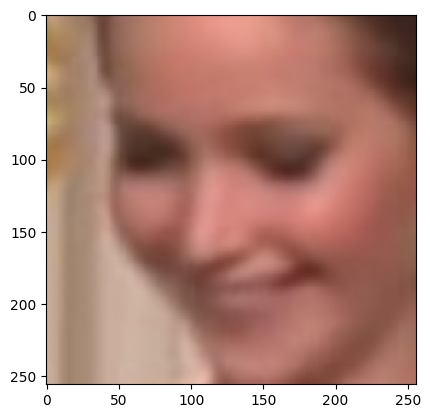

In [104]:


# Create an instance of the Meso4 class
meso = Meso4()

# Rendering image X with label y for MesoNet
X, y = next(generator)

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));



In [106]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [107]:
# Generating predictions on validation set, storing in separate lists
for i in range(len(generator)):

    # Loading next batch of images and labels
    X, y = generator[i]

    # Generating prediction
    pred = meso.predict(X)[0][0]

    # Sorting into proper category
    if round(pred) == y[0] and y[0] == 1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred) == y[0] and y[0] == 0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0] == 1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)

    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')

print("All", len(generator), "predictions completed")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0  predictions completed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

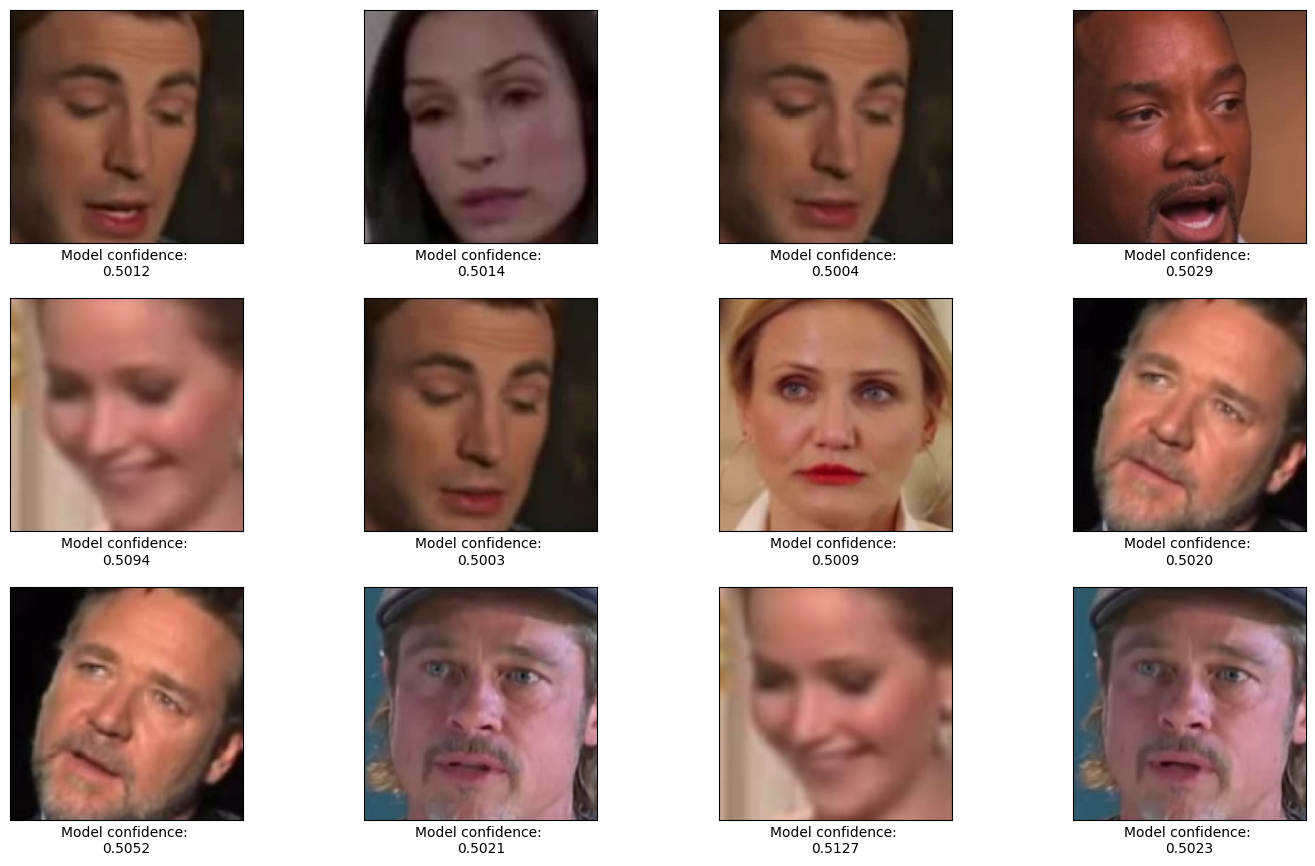

In [112]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

# Plot correctly classified real images along with model confidence scores.
plotter(correct_real, correct_real_pred)


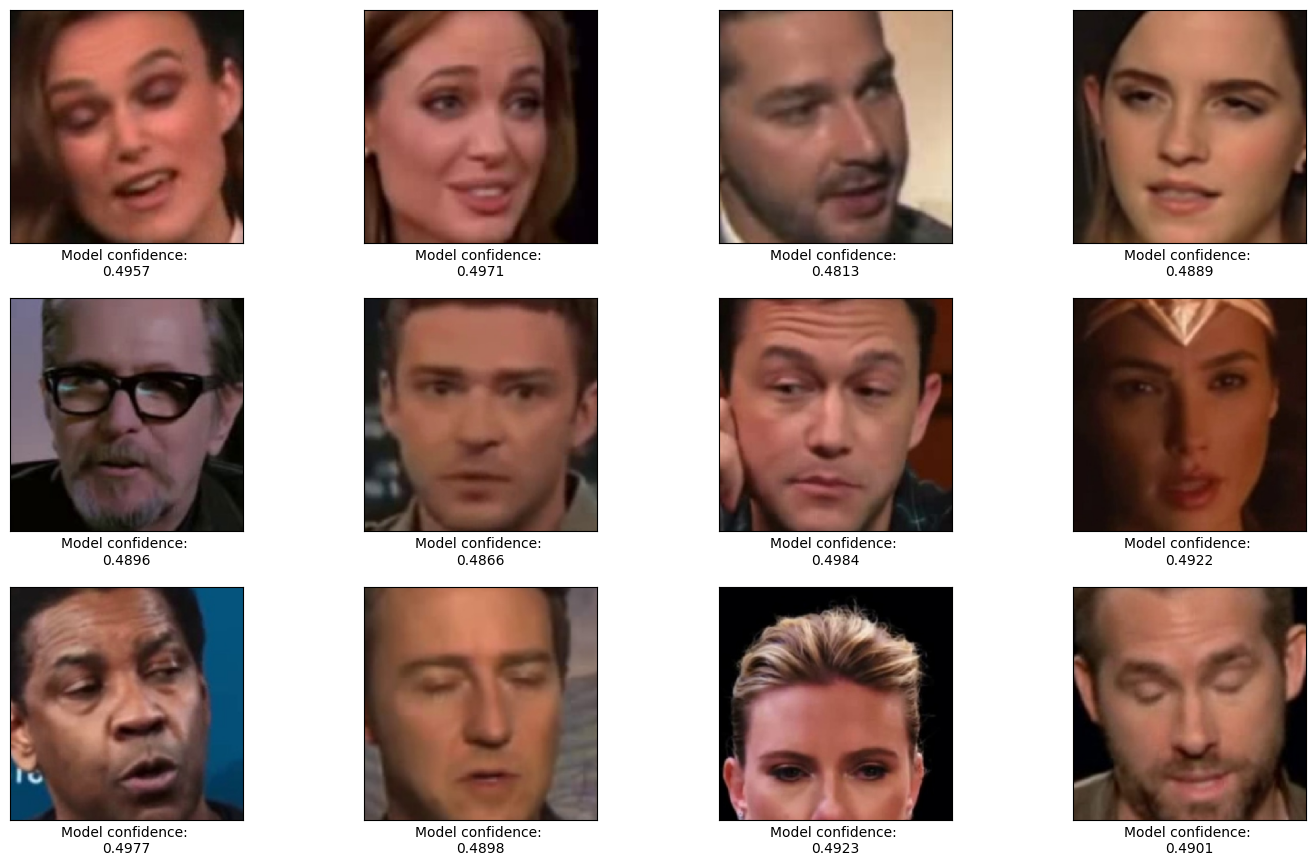

In [113]:
# Plot misclassified real images along with model confidence scores.
plotter(misclassified_real, misclassified_real_pred)



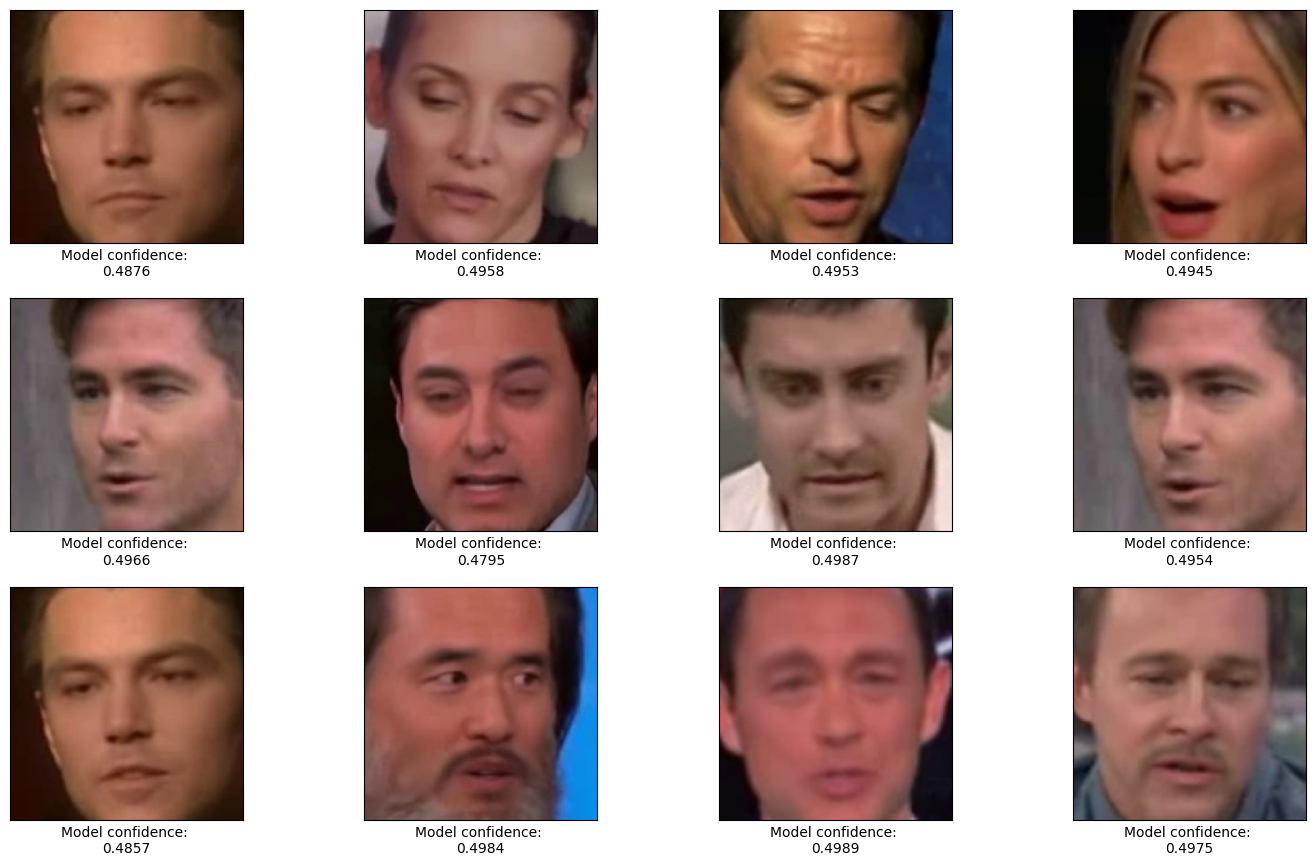

In [114]:
# Plot correctly classified deepfake images along with model confidence scores.
plotter(correct_deepfake, correct_deepfake_pred)


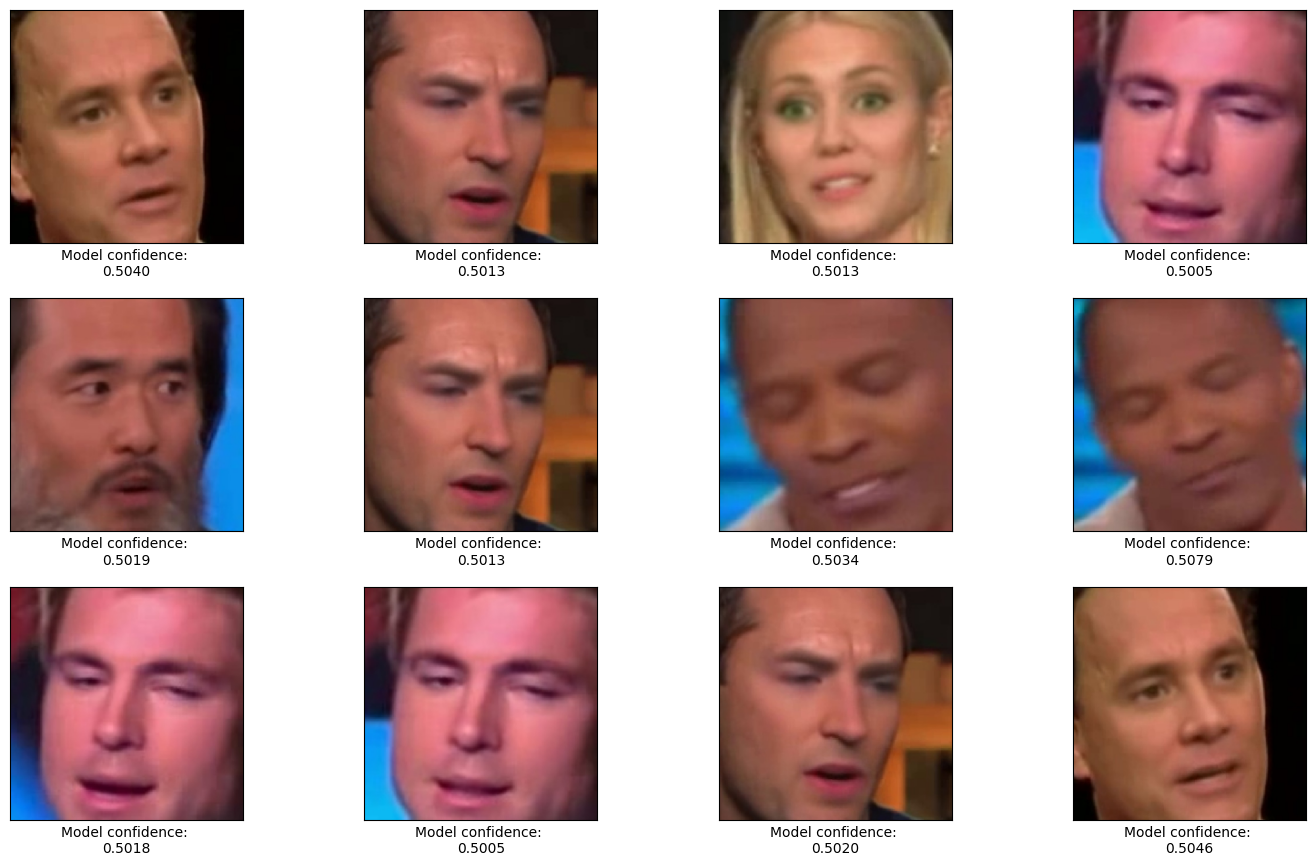

In [115]:
# Plot misclassified deepfake images along with model confidence scores.
plotter(misclassified_deepfake, misclassified_deepfake_pred)

In [116]:
# Calculate accuracy for correctly classified real images
correct_real_accuracy = len(correct_real) / len(generator)

# Calculate accuracy for misclassified real images
misclassified_real_accuracy = 1 - (len(misclassified_real) / len(generator))

# Calculate accuracy for correctly classified deepfake images
correct_deepfake_accuracy = len(correct_deepfake) / len(generator)

# Calculate accuracy for misclassified deepfake images
misclassified_deepfake_accuracy = 1 - (len(misclassified_deepfake) / len(generator))

# Overall accuracy
total_accuracy = (len(correct_real) + len(correct_deepfake)) / len(generator)

print("Correctly classified real images accuracy:", correct_real_accuracy)
print("Misclassified real images accuracy:", misclassified_real_accuracy)
print("Correctly classified deepfake images accuracy:", correct_deepfake_accuracy)
print("Misclassified deepfake images accuracy:", misclassified_deepfake_accuracy)
print("Overall accuracy:", total_accuracy)


Correctly classified real images accuracy: 0.14991181657848324
Misclassified real images accuracy: 0.6437389770723104
Correctly classified deepfake images accuracy: 0.42504409171075835
Misclassified deepfake images accuracy: 0.9312169312169312
Overall accuracy: 0.5749559082892416


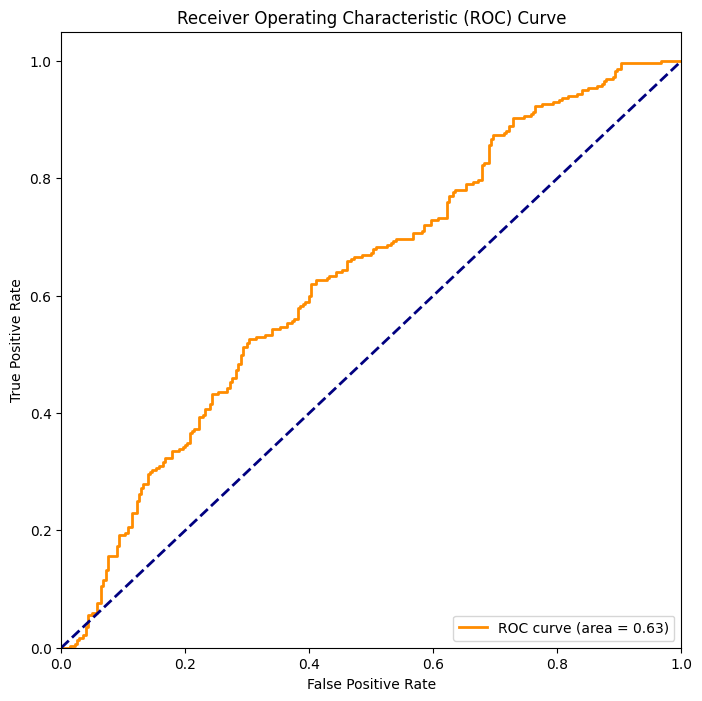

In [117]:
from sklearn.metrics import roc_curve, auc

# Concatenate the predictions and true labels for all images
all_predictions = correct_real_pred + misclassified_real_pred + correct_deepfake_pred + misclassified_deepfake_pred
all_labels = [1] * len(correct_real_pred) + [1] * len(misclassified_real_pred) + [0] * len(correct_deepfake_pred) + [0] * len(misclassified_deepfake_pred)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(all_labels, all_predictions)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
